## Crisis Prediction in African Economies

Given *data about financial climates in various African countries throughout the years*, let's try to predict whether a **banking crisis** occurred or not in a given year in a given country.

We will use a TensorFlow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/chirin/africa-economic-banking-and-systemic-crisis-data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('archive/african_crises.csv')
data

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

### Preprocessing

In [4]:
df = data.copy()

Checking if systemic crisis differs from banking crisis in any way.

In [10]:
((df['banking_crisis'] == 'crisis').astype(int) == df['systemic_crisis']).all()

np.False_

Checking for missing values.

In [11]:
df.isna().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

#### Encoding

In [12]:
df = df.drop(['case', 'country'], axis=1)

In [13]:
df

,cc3,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,DZA,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,DZA,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,DZA,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,DZA,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,DZA,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,ZWE,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,ZWE,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,ZWE,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,ZWE,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [16]:
cc3_dummies = pd.get_dummies(df['cc3'], dtype=int)
df = pd.concat([df, cc3_dummies], axis=1)
df = df.drop('cc3', axis=1)

In [19]:
df

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,...,DZA,EGY,KEN,MAR,MUS,NGA,TUN,ZAF,ZMB,ZWE
0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1055,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1056,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1057,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
y = df['banking_crisis'].copy()
X = df.drop('banking_crisis', axis=1).copy()

In [20]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)
y

array([0, 1, 1, ..., 1, 1, 1], shape=(1059,))

In [21]:
{index: label for index, label in enumerate(label_encoder.classes_)}

{0: 'crisis', 1: 'no_crisis'}

In [24]:
y = pd.Series(y).apply(lambda x: 1-x)
y

0       1
1       0
2       0
3       0
4       0
       ..
1054    1
1055    0
1056    0
1057    0
1058    0
Length: 1059, dtype: int64

Now y = 1 means crisis and y = 0 means no crisis.

### Scaling

In [25]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,...,DZA,EGY,KEN,MAR,MUS,NGA,TUN,ZAF,ZMB,ZWE
0,-2.917150,3.451758,-0.386713,-0.203219,-0.424973,-0.147006,-0.030863,-1.862352,-0.378058,-0.385474,...,3.385088,-0.414078,-0.259885,-0.276079,-0.26195,-0.245072,-0.276079,-0.347325,-0.270089,-0.304761
1,-2.887313,-0.289707,-0.386708,-0.203219,-0.424973,-0.147006,-0.030848,-1.862352,-0.378058,-0.385474,...,3.385088,-0.414078,-0.259885,-0.276079,-0.26195,-0.245072,-0.276079,-0.347325,-0.270089,-0.304761
2,-2.857475,-0.289707,-0.386712,-0.203219,-0.424973,-0.147006,-0.030874,-1.862352,-0.378058,-0.385474,...,3.385088,-0.414078,-0.259885,-0.276079,-0.26195,-0.245072,-0.276079,-0.347325,-0.270089,-0.304761
3,-2.827638,-0.289707,-0.386718,-0.203219,-0.424973,-0.147006,-0.030852,-1.862352,-0.378058,-0.385474,...,3.385088,-0.414078,-0.259885,-0.276079,-0.26195,-0.245072,-0.276079,-0.347325,-0.270089,-0.304761
4,-2.797800,-0.289707,-0.386721,-0.203219,-0.424973,-0.147006,-0.030874,-1.862352,-0.378058,-0.385474,...,3.385088,-0.414078,-0.259885,-0.276079,-0.26195,-0.245072,-0.276079,-0.347325,-0.270089,-0.304761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,1.230271,3.451758,2.797088,4.920801,2.353091,-0.147006,-0.030880,0.536955,2.481682,-0.385474,...,-0.295413,-0.414078,-0.259885,-0.276079,-0.26195,-0.245072,-0.276079,-0.347325,-0.270089,3.281260
1055,1.260109,-0.289707,3.007099,4.920801,2.353091,-0.147006,-0.030864,0.536955,-0.378058,-0.385474,...,-0.295413,-0.414078,-0.259885,-0.276079,-0.26195,-0.245072,-0.276079,-0.347325,-0.270089,3.281260
1056,1.289946,-0.289707,2.860809,4.920801,2.353091,-0.147006,-0.030861,0.536955,-0.378058,-0.385474,...,-0.295413,-0.414078,-0.259885,-0.276079,-0.26195,-0.245072,-0.276079,-0.347325,-0.270089,3.281260
1057,1.319784,-0.289707,2.860809,4.920801,2.353091,-0.147006,-0.030863,0.536955,-0.378058,-0.385474,...,-0.295413,-0.414078,-0.259885,-0.276079,-0.26195,-0.245072,-0.276079,-0.347325,-0.270089,3.281260


### Splitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=1)

### Training

In [29]:
y.sum()*100/len(y)

np.float64(8.876298394711993)

In [30]:
inputs = tf.keras.Input(shape=(23, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8767 - auc: 0.3989 - loss: 0.4699 - val_accuracy: 0.9262 - val_auc: 0.4937 - val_loss: 0.3220 - learning_rate: 0.0010
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9122 - auc: 0.6499 - loss: 0.3092 - val_accuracy: 0.9262 - val_auc: 0.8426 - val_loss: 0.2403 - learning_rate: 0.0010
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9139 - auc: 0.8989 - loss: 0.2356 - val_accuracy: 0.9329 - val_auc: 0.9223 - val_loss: 0.1925 - learning_rate: 0.0010
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9291 - auc: 0.9585 - loss: 0.1812 - val_accuracy: 0.9329 - val_auc: 0.9209 - val_loss: 0.1607 - learning_rate: 0.0010
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9459 - auc: 0.9664 - loss: 0.1425 - val_accuracy: 0.9530 - val_auc: 0.9302 - val_loss: 0.1370 - learning_rate: 0.0010
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9628 - auc: 0.9729 -

### Results

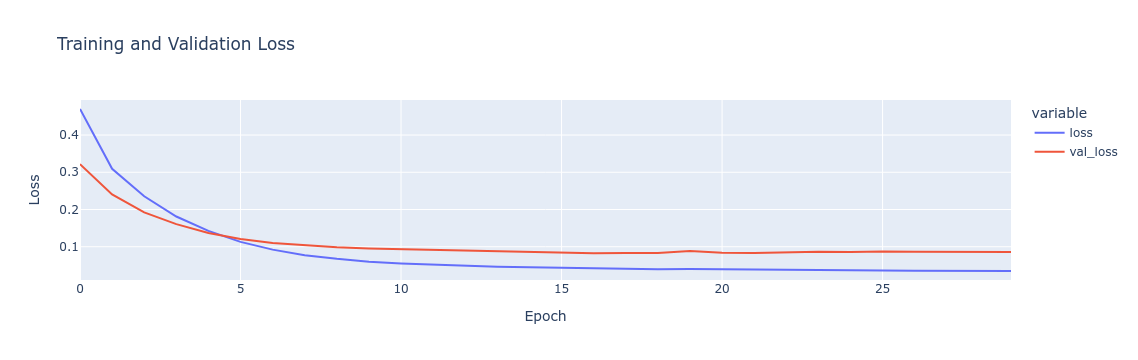

In [31]:
fig = px.line(
    history.history,
    y = ['loss', 'val_loss'],
    labels = {'index': 'Epoch', 'value': 'Loss'},
    title = 'Training and Validation Loss'
)

fig.show()

In [32]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9748 - auc: 0.9544 - loss: 0.1166 


[0.1165505051612854, 0.9748427867889404, 0.9543665647506714]